In [202]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [122]:
#loading training dataset
X=pd.read_csv(r'C:\Users\user\Documents\uni\ML\x_train.csv')
X.columns=["website",'reviews']
X

,website,reviews
0,amazon,THAT one didn't work either.
1,amazon,Waste of 13 bucks.
2,amazon,"Product is useless, since it does not have eno..."
3,amazon,None of the three sizes they sent with the hea...
4,amazon,Worst customer service.
...,...,...
2394,yelp,The sweet potato fries were very good and seas...
2395,yelp,I could eat their bruschetta all day it is dev...
2396,yelp,Ambience is perfect.
2397,yelp,We ordered the duck rare and it was pink and t...


In [160]:
Y=pd.read_csv(r'C:\Users\user\Documents\uni\ML\y_train.csv')
Y.columns=["sentiment"]
Y


,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
2394,1
2395,1
2396,1
2397,1


In [191]:
Y_test=pd.read_csv(r'C:\Users\user\Documents\uni\ML\y_test.csv')
Y_test.columns=['sentiment']
Y_test

,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
594,1
595,1
596,1
597,1


In [186]:
X_test=pd.read_csv(r'C:\Users\user\Documents\uni\ML\x_test.csv')
X_test.columns=["website",'reviews']
X_test

,website,reviews
0,amazon,Disappointing accessory from a good manufacturer.
1,amazon,The one big drawback of the MP3 player is that...
2,amazon,This particular model would not work with my M...
3,amazon,If the two were seperated by a mere 5+ ft I st...
4,amazon,Also the area where my unit broke).- I'm not t...
...,...,...
594,yelp,Everything was fresh and delicious!
595,yelp,#NAME?
596,yelp,Pretty awesome place.
597,yelp,"The staff are great, the ambiance is great."


In [125]:
#looking foor empty value
X.isnull().sum()

website    0
reviews    0
dtype: int64

In [126]:
y.isnull().sum()

sentiment    0
dtype: int64

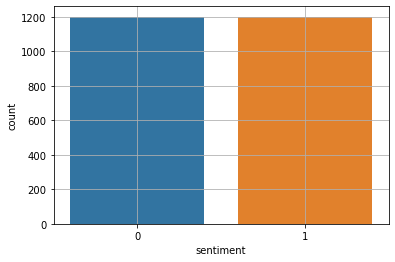

In [127]:
#counting number of reviews in each category
sns.countplot(x=y['sentiment'])
plt.grid()

In [128]:
#converting the reviews to list
review_train=X['reviews'].values.tolist()
review_train

["THAT one didn't work either.",
 'Waste of 13 bucks.',
 'Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.',
 'None of the three sizes they sent with the headset would stay in my ears.',
 'Worst customer service.',
 'The Ngage is still lacking in earbuds.',
 'It always cuts out and makes a beep beep beep sound then says signal failed.',
 'the only VERY DISAPPOINTING thing was there was NO SPEAKERPHONE!!!!',
 'Very disappointed in AccessoryOne.',
 'Basically the service was very bad.',
 'Bad Choice.',
 'The only thing that disappoint me is the infra red port (irda).',
 'horrible, had to switch 3 times.',
 'It feels poorly constructed, the menus are difficult to navigate, and the buttons are so recessed that it is difficult to push them.',
 "Don't make the same mistake I did.",
 "Muddy, low quality sound, and the casing around the wire's insert was poorly super glued and slid off.",
 'I advise EVERYONE DO NOT BE 

In [129]:
review_test=X_test['reviews'].values.tolist()
review_test

['Disappointing accessory from a good manufacturer.',
 "The one big drawback of the MP3 player is that the buttons on the phone's front cover that let you pause and skip songs lock out after a few seconds.",
 'This particular model would not work with my Motorola Q smartphone.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 "Also the area where my unit broke).- I'm not too fond of the magnetic strap.",
 'What possesed me to get this junk, I have no idea...',
 'The mic there is a joke, and the volume is quite low.',
 'I purchased this and within 2 days it was no longer working!!!!!!!!!',
 'The picture resolution is far below what other comparably-priced phones are offering today.',
 'AFTER ARGUING WITH VERIZON REGARDING THE DROPPED CALLS WE RETURNED THE PHONES AFTER TWO DAYS.',
 'My experience was terrible..... This was my fourth bluetooth headset, and while it was much more comfortable than my last Jabra (which I

In [136]:
#cleaning data
replace_nospace=re.compile("[,;:.'!/#$%'&""^@]")
replace_wspace=re.compile("(<br\s*/><br\s*/>){}|(\-)(\/)")

def preprocess_rev(reviews):
    reviews=[replace_nospace.sub("",line.lower()) for line in reviews]
    reviews=[replace_wspace.sub(" ",line) for line in reviews]
    return reviews

review_train_clean= preprocess_rev(review_train)
review_test_clean= preprocess_rev(review_test)

In [144]:
#removing stopwords
stop_words=stopwords.words('english')
stop_words.remove('not')
def remove_stopwords(corpus):
    removed_stop_words=[]
    for review in corpus:
        removed_stop_words.append (' '.join([word for word in review.split() if word not in stop_words]))
    
    return removed_stop_words
    
no_stop_words_train=remove_stopwords(review_train_clean)
no_stop_words_test=remove_stopwords(review_test_clean)
no_stop_words_train

['one didnt work either',
 'waste 13 bucks',
 'product useless since not enough charging current charge 2 cellphones planning use',
 'none three sizes sent headset would stay ears',
 'worst customer service',
 'ngage still lacking earbuds',
 'always cuts makes beep beep beep sound says signal failed',
 'disappointing thing speakerphone',
 'disappointed accessoryone',
 'basically service bad',
 'bad choice',
 'thing disappoint infra red port (irda)',
 'horrible switch 3 times',
 'feels poorly constructed menus difficult navigate buttons recessed difficult push',
 'dont make mistake',
 'muddy low quality sound casing around wires insert poorly super glued slid',
 'advise everyone not fooled',
 'doesnt hold charge',
 'waste time',
 'im disappointed decision',
 'also didnt like "on" button felt like would crack use',
 'bought hoping could make bluetooth headset fit better things made impossible wear',
 'tried 2 units failed within 2 months pros',
 'also difficult put onid recommend avoidin

In [204]:
def lemmetizeText(rev):
    lemmatizer=WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in rev]
lemma_rev_train=lemmetizeText(no_stop_words_train)
lemma_rev_test=lemmetizeText(no_stop_words_test)

    

In [230]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# creating vectorization and Ngram
ngram_vectorizer=CountVectorizer(binary=True,ngram_range=(1,2))
ngram_vectorizer.fit(lemma_rev_train)
X=ngram_vectorizer.transform(lemma_rev_train)
X_test=ngram_vectorizer.transform(lemma_rev_test)
y=Y["sentiment"].to_numpy()
y_test=Y_test['sentiment'].to_numpy()
print(np.shape(X))
print(np.shape(y))
print(np.shape(X_test))
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=.75,random_state=0)
cv=RepeatedKFold(n_splits=10,n_repeats=3)
for c in [.01,.05,.25,.5,1]:
    model=LogisticRegression(C=c)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_val)
    score=accuracy_score(y_val,y_pred)
    print ("accuracy score for c %0.2f is %0.2f"%(c,score))
    scores_model=cross_val_score(model,X_val,y_val,scoring="accuracy",cv=cv)
    print("mean accuracy score for c %0.2f"%(c))
    print(scores_model.mean())

print("Classification Report for Logistic Regression is ")
print(classification_report(y_val,y_pred))

(2399, 15895)
(2399,)
(599, 15895)
accuracy score for c 0.01 is 0.77
mean accuracy score for c 0.01
0.6277777777777778
accuracy score for c 0.05 is 0.80
mean accuracy score for c 0.05
0.7066666666666667
accuracy score for c 0.25 is 0.81
mean accuracy score for c 0.25
0.7294444444444446
accuracy score for c 0.50 is 0.82
mean accuracy score for c 0.50
0.7327777777777779
accuracy score for c 1.00 is 0.83
mean accuracy score for c 1.00
0.73
Classification Report for Logistic Regression is 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       297
           1       0.85      0.80      0.82       303

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



In [232]:
from sklearn.tree import DecisionTreeClassifier
for r in [0,1,41]:
    model_DTC=DecisionTreeClassifier(criterion="entropy",random_state=r)
    model_DTC.fit(X_train,y_train)

    y_pred=model_DTC.predict(X_val)
    score=accuracy_score(y_val,y_pred)
    print ("accuracy score for r %0.2f is %0.2f"%(r,score))
    scores_model_DTC=cross_val_score(model_DTC,X_val,y_val,scoring="accuracy",cv=cv)
    print("mean accuracy score for r %0.2f"%(r))
    print(scores_model_DTC.mean())
print("Classification Report for Decision tree classifier is ")
print(classification_report(y_val,y_pred))


accuracy score for r 0.00 is 0.78
mean accuracy score for r 0.00
0.7083333333333333
accuracy score for r 1.00 is 0.77
mean accuracy score for r 1.00
0.696111111111111
accuracy score for r 41.00 is 0.79
mean accuracy score for r 41.00
0.6888888888888889
Classification Report for Decision tree classifier is 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       297
           1       0.84      0.72      0.78       303

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



In [234]:
from sklearn.naive_bayes import GaussianNB
X_train_array=X_train.toarray()
X_val_array=X_val.toarray()
model_NB=GaussianNB()
model_NB.fit(X_train_array,y_train)
model.fit(X_train_array,y_train)
scores_model_NB=cross_val_score(model_NB,X_val_array,y_val,scoring="accuracy",cv=cv)
y_pred=model_NB.predict(X_val_array)
score=accuracy_score(y_val,y_pred)

print(scores_model_NB)
print("%0.2f accuracy with a standard deviation of %0.2f for Naive Bayes classifier" % (scores_model_NB.mean(), scores_model_NB.std()))
print("Classification Report for NAive Bayes is ")
print(classification_report(y_val,y_pred))

[0.65       0.65       0.65       0.7        0.65       0.63333333
 0.73333333 0.61666667 0.7        0.78333333 0.66666667 0.73333333
 0.78333333 0.66666667 0.56666667 0.7        0.7        0.71666667
 0.73333333 0.65       0.78333333 0.58333333 0.73333333 0.63333333
 0.66666667 0.65       0.68333333 0.78333333 0.66666667 0.66666667]
0.68 accuracy with a standard deviation of 0.06 for Naive Bayes classifier
Classification Report for NAive Bayes is 
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       297
           1       0.83      0.63      0.72       303

    accuracy                           0.75       600
   macro avg       0.77      0.75      0.75       600
weighted avg       0.77      0.75      0.75       600



In [233]:
#applying the final model
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=.75,random_state=0)
cv=RepeatedKFold(n_splits=10,n_repeats=3)
final_model=LogisticRegression(C=1.0)
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)
score=accuracy_score(y_test,y_pred)


final_scores_logreg=cross_val_score(final_model,X_test,y_test,cv=cv)
print(final_scores_logreg)
print("%0.2f accuracy with a standard deviation of %0.2f for logistic regression" % (final_scores_logreg.mean(), final_scores_logreg.std()))
print("Classification Report for Logistic regression is ")
print(classification_report(y_test,y_pred))
print("The Following shows Predicted and Actual Ratings ")

data={'Prediction':y_pred,'Actual':y_test}
df1=pd.DataFrame(data)
df1

[0.63333333 0.68333333 0.66666667 0.76666667 0.71666667 0.75
 0.8        0.86666667 0.71666667 0.79661017 0.75       0.76666667
 0.75       0.83333333 0.71666667 0.7        0.71666667 0.76666667
 0.78333333 0.74576271 0.75       0.75       0.75       0.73333333
 0.85       0.83333333 0.8        0.76666667 0.58333333 0.74576271]
0.75 accuracy with a standard deviation of 0.06 for logistic regression
Classification Report for Logistic regression is 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       299
           1       0.88      0.77      0.82       300

    accuracy                           0.83       599
   macro avg       0.84      0.83      0.83       599
weighted avg       0.84      0.83      0.83       599

The Following shows Predicted and Actual Ratings 


,Prediction,Actual
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
594,1,1
595,0,1
596,1,1
597,1,1
